In [50]:
# url: https://www.tensorflow.org/tutorials/keras/classification

In [7]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [8]:
print(tf.__version__)

2.1.0


# Import the Fashion MNIST dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 9s 2us/step


In [13]:
train_images[0]
train_labels[0]

9

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Preprocess the data

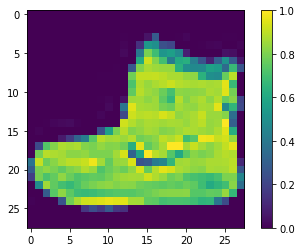

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
train_images = train_images / 255.0
test_images = test_images / 255.0

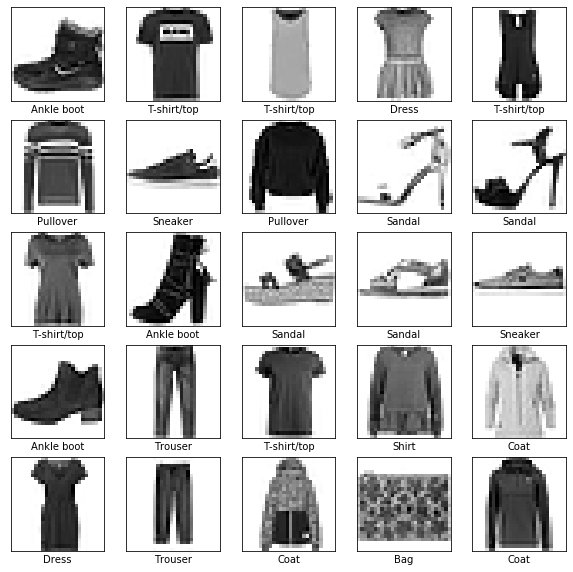

In [36]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [42]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [43]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5024 - accuracy: 0.8239
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3792 - accuracy: 0.8625
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3410 - accuracy: 0.8755
Epoch 4/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3176 - accuracy: 0.8837
Epoch 5/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2973 - accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2809 - accuracy: 0.8949
Epoch 7/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2668 - accuracy: 0.9010
Epoch 8/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2592 - accuracy: 0.9032
Epoch 9/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2474 - accuracy: 0.9080
Epoch 10/10
60

# Evaluate accuracy

In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3808 - accuracy: 0.8690

Test accuracy: 0.869


# Make predictions

In [46]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [47]:
predictions = probability_model.predict(test_images)

In [48]:
predictions[0]

array([6.2160637e-09, 2.0744579e-09, 8.1475604e-10, 6.2737551e-11,
       3.9688524e-09, 9.2722801e-04, 1.2862986e-11, 2.3185018e-02,
       2.9505258e-09, 9.7588772e-01], dtype=float32)

In [49]:
test_labels[0]

9

In [57]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [64]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

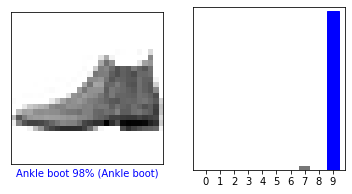

In [66]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

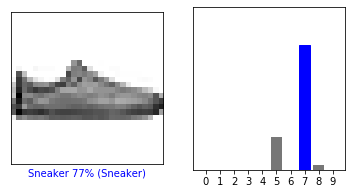

In [65]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

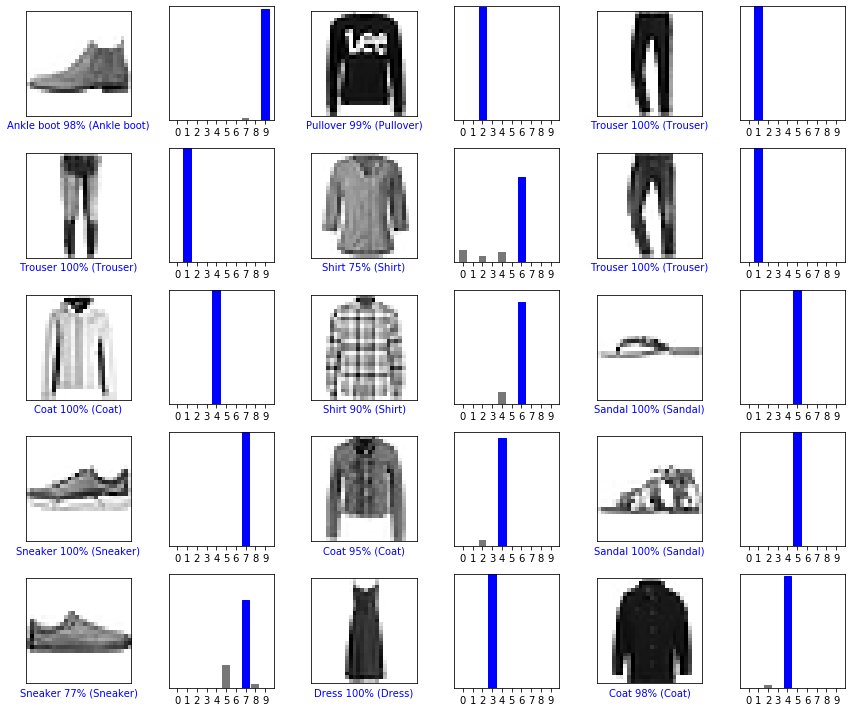

In [68]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the trained model

In [69]:
# Grab an image from the test dataset
img = test_images[i]
print(img.shape)

(28, 28)


In [70]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [71]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[7.38457311e-05 1.00748803e-05 2.16464438e-02 2.93652147e-06
  9.77554679e-01 1.80291424e-13 6.00381289e-04 7.72242340e-12
  1.11564244e-04 4.75813070e-11]]


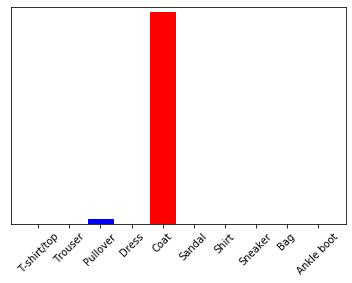

In [75]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [76]:
np.argmax(predictions_single[0])

4